In [1]:
import numpy as np
import matplotlib.pyplot as plt
import histlite

import sys
sys.path.append("/Users/yumiao/Documents/Works/0nbb/nEXO/Physics/sterile_nu/sensitivity")

from neutrino_source import neutrino_source
from detector import detector


SyntaxError: invalid syntax (detector.py, line 13)

In [ ]:
source = neutrino_source('Cr51', 1e5, [0.75], [0.9])
det = detector('nEXO')

det.position = (0, 0, 0)
dist = 0.1
source.position = (0, 0, -det.height/2-dist)

det.run_time = 100 # days


A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [0.9] is created.


In [ ]:

Emin, Emax, Estep = 0.3, 1.0, 0.01 # unit: MeV
bins = np.arange(Emin, Emax, Estep)
dm2 = 1 # unit: eV
sin2theta_square = 0.1



In [4]:
import MC_generator
import importlib
importlib.reload(MC_generator)

import MC_generator
gen = MC_generator.MC_generator(source, det, bins, dm2, sin2theta_square)

In [40]:
gen.scale_counts()

gen.n_events = 1e7

In [19]:
nonosc_nu_pos, nonosc_bl = gen.generate_nonoscillate_Asimov_dataset()
print(len(nonosc_nu_pos))

4590


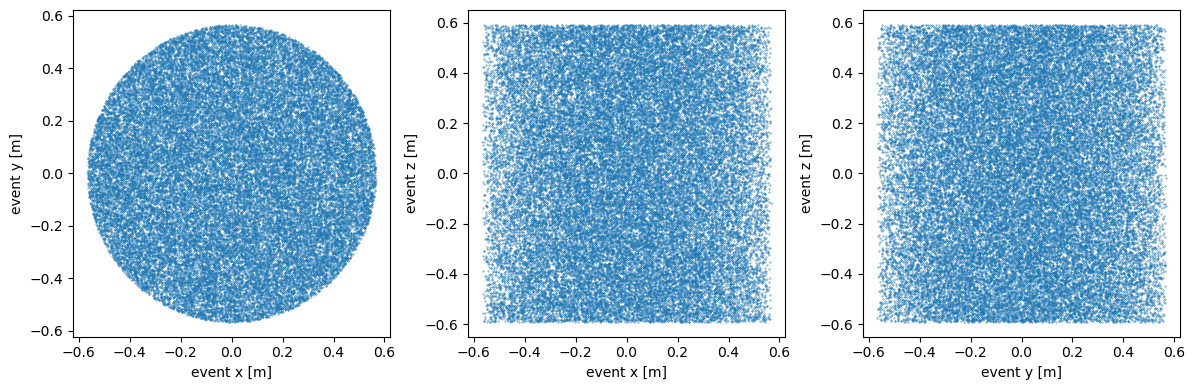

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(12 ,4))
pos = np.array(nonosc_nu_pos)
ax[0].scatter(pos[:, 0], pos[:, 1], s=0.1)
ax[0].set_xlabel('event x [m]')
ax[0].set_ylabel('event y [m]')
ax[1].scatter(pos[:, 0], pos[:, 2], s=0.1)
ax[1].set_xlabel('event x [m]')
ax[1].set_ylabel('event z [m]')
ax[2].scatter(pos[:, 1], pos[:, 2], s=0.1)
ax[2].set_xlabel('event y [m]')
ax[2].set_ylabel('event z [m]')
plt.tight_layout()

In [41]:
osc_nu_pos, osc_bl = gen.generate_oscillate_Asimov_dataset(0.75)
print(len(osc_nu_pos))

In [22]:
print(f"Average survival probability is {len(osc_nu_pos) / len(nonosc_nu_pos):.4f}. ")

Average survival probability is 0.9216. 


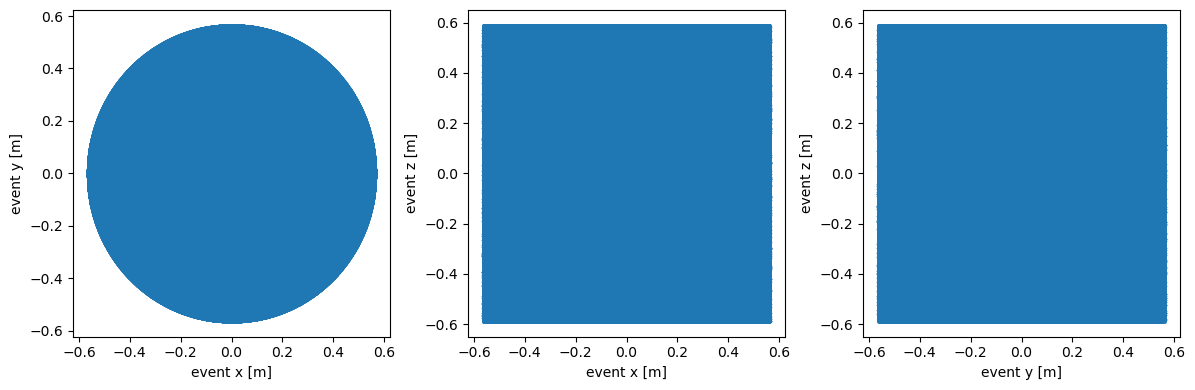

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12 ,4))
pos = np.array(osc_nu_pos)
ax[0].scatter(pos[:, 0], pos[:, 1], s=0.1)
ax[0].set_xlabel('event x [m]')
ax[0].set_ylabel('event y [m]')
ax[1].scatter(pos[:, 0], pos[:, 2], s=0.1)
ax[1].set_xlabel('event x [m]')
ax[1].set_ylabel('event z [m]')
ax[2].scatter(pos[:, 1], pos[:, 2], s=0.1)
ax[2].set_xlabel('event y [m]')
ax[2].set_ylabel('event z [m]')
plt.tight_layout()

In [38]:
out = np.histogram2d(pos[:,0]**2+pos[:,1]**2, pos[:, 2], bins=(100, 100), range=([0, det.radius**2], [-det.radius, det.radius]))

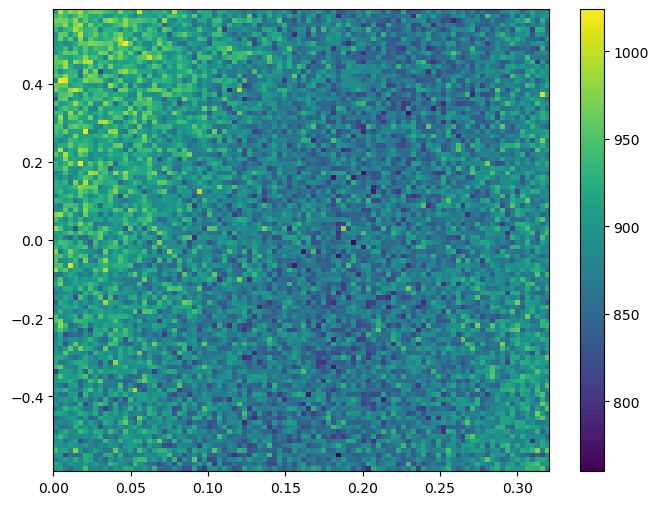

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(out[0], extent=[0, det.radius**2, -det.height/2., det.height/2.], aspect='auto')
cb = plt.colorbar(im, ax=ax)

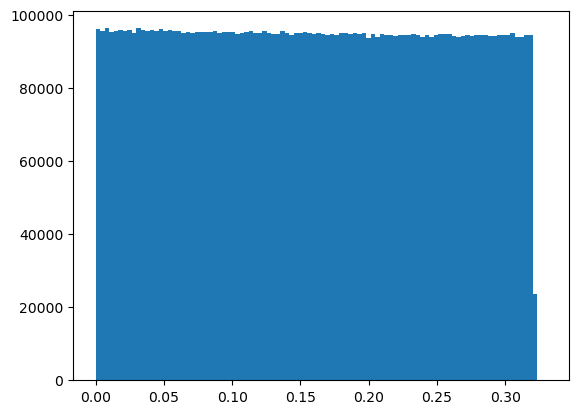

In [34]:
plt.hist(pos[:, 1]**2+pos[:, 0]**2, bins=100, range=(0, 0.33));

In [33]:
print(det.radius**2, det.height)

0.32092225 1.183
